In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# walk_dir = [[dirname, _, filenames] for dirname, _, filenames in os.walk('/kaggle/input')]
# imp_arr = []
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     arr = []
#     for filename in filenames:
#         arr.append(os.path.join(dirname, filename))
#     imp_arr.append(arr)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import os

In [4]:
imp_arr = [None,['/kaggle/input/early-detection-of-3d-printing-issues/sample_submission.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/train.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/test.csv']]
imp_arr[1]

['/kaggle/input/early-detection-of-3d-printing-issues/sample_submission.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/train.csv',
 '/kaggle/input/early-detection-of-3d-printing-issues/test.csv']

In [5]:
def crop_transform(img):
    return img[:224, 100:324, :]

In [6]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the paths to your CSV files
data_csv_path = imp_arr[1][1]

# Load the CSV files into pandas dataframes
data_df = pd.read_csv(data_csv_path).iloc[::100]

# Split the data into train, validation, and test sets
train_df = data_df[data_df['printer_id'].isin([101, 102])]
val_df = data_df[data_df['printer_id'].isin([103, 104])]
test_df = data_df[data_df['printer_id'].isin([22])]

# Create a function to load and preprocess images
def load_image(image_path, label):
    # Load the image from the file path
    image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + image_path)
    # Decode the image and convert to float32
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to a consistent size
#     image = tf.image.resize(image, [224, 224])
    image = image[:224, 100:324, :]
    return image, label

# Create a tf.data.Dataset for the training set
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['img_path'], train_df['has_under_extrusion']))
train_dataset = train_dataset.map(load_image)
train_dataset = train_dataset.shuffle(buffer_size=len(train_df))
train_dataset = train_dataset.batch(batch_size=32)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create a tf.data.Dataset for the validation set
val_dataset = tf.data.Dataset.from_tensor_slices((val_df['img_path'], val_df['has_under_extrusion']))
val_dataset = val_dataset.map(load_image)
val_dataset = val_dataset.batch(batch_size=32)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Create a tf.data.Dataset for the test set
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['img_path'], test_df['has_under_extrusion']))
test_dataset = test_dataset.map(load_image)
test_dataset = test_dataset.batch(batch_size=32)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [7]:

# Set the paths to your CSV files
test_data_csv_path = imp_arr[1][2]

# Load the CSV files into pandas dataframes
# data_df = pd.read_csv(data_csv_path).iloc[::100]
test_data_df = pd.read_csv(test_data_csv_path)


# Create a function to load and preprocess images
def test_load_image(image_path):
    # Load the image from the file path
    image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + image_path)
    # Decode the image and convert to float32
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to a consistent size
#     image = tf.image.resize(image, [224, 224])
    image = image[:224, 100:324, :]
    return image

# Create a tf.data.Dataset for the test set
final_test_dataset = tf.data.Dataset.from_tensor_slices((test_data_df['img_path']))
final_test_dataset = final_test_dataset.map(test_load_image)
final_test_dataset = final_test_dataset.batch(batch_size=32)
final_test_dataset = final_test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [8]:
sample_submission = pd.read_csv(imp_arr[1][0])
train_df = pd.read_csv(imp_arr[1][1])
test_df = pd.read_csv(imp_arr[1][2])

In [9]:
0 in data_df['has_under_extrusion']

True

In [10]:
data_df

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
100,101/1678589738/1678589955.116972.jpg,101,1678589738,1
200,101/1678589738/1678589996.075162.jpg,101,1678589738,1
300,101/1678589738/1678590037.233739.jpg,101,1678589738,1
400,101/1678589738/1678590078.402541.jpg,101,1678589738,1
...,...,...,...,...
80600,022/1672868532/1672869247.22188.jpg,22,1672868532,1
80700,022/1672857603/1672857755.099674.jpg,22,1672857603,1
80800,022/1672857603/1672857856.006613.jpg,22,1672857603,1
80900,022/1672857603/1672857956.787276.jpg,22,1672857603,1


In [11]:
train_df

,img_path,printer_id,print_id,has_under_extrusion
0,101/1678589738/1678589914.060332.jpg,101,1678589738,1
1,101/1678589738/1678589914.462857.jpg,101,1678589738,1
2,101/1678589738/1678589914.875075.jpg,101,1678589738,1
3,101/1678589738/1678589915.284495.jpg,101,1678589738,1
4,101/1678589738/1678589915.700486.jpg,101,1678589738,1
...,...,...,...,...
81055,022/1672857603/1672858113.083624.jpg,22,1672857603,1
81056,022/1672857603/1672858114.101455.jpg,22,1672857603,1
81057,022/1672857603/1672858115.107314.jpg,22,1672857603,1
81058,022/1672857603/1672858116.11023.jpg,22,1672857603,1


In [12]:
im_base_path = "/kaggle/input/early-detection-of-3d-printing-issues/images/"

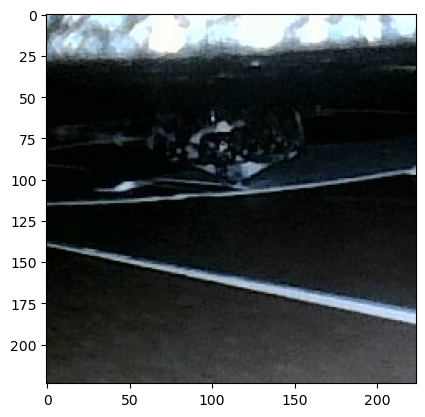

In [13]:
a = plt.imread(im_base_path + train_df['img_path'].iloc[6510])
plt.imshow(a[:224, 100:324, :])
# plt.imshow(a)

In [14]:
import tensorflow as tf
import tensorflow_hub as hub
import torch
# model = tf.keras.Sequential([
#     hub.KerasLayer("https://kaggle.com/models/spsayakpaul/vision-transformer/frameworks/TensorFlow2/variations/vit-b8-fe/versions/1", trainable=True),
#     tf.keras.layers.Dense(2)
# ])

In [15]:
vit_model = "https://kaggle.com/models/spsayakpaul/vision-transformer/frameworks/TensorFlow2/variations/vit-b8-fe/versions/1"
feature_extractor_model = vit_model

In [16]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100
BUFFER_SIZE = 100
def get_batch_size(num_gpus=1):
    batch_size = BATCH_SIZE_PER_REPLICA * num_gpus
    print(f'BATCH_SIZE = {batch_size}')
    return batch_size

options = tf.data.Options()
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
custom_train_set = train_dataset.with_options(options).cache().shuffle(BUFFER_SIZE).prefetch(tf.data.AUTOTUNE)
final_test_dataset = final_test_dataset.with_options(options)

In [17]:
import tensorflow_addons as tfa
import numpy as np

In [18]:
import datetime
def build_model():
    f1_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)
    precision_metric = tf.keras.metrics.Precision()
    _feature_extractor_layer = hub.KerasLayer(
        feature_extractor_model,
        input_shape=(224, 224, 3),
        trainable=False
    )
    
    num_classes = 1
    mdl = tf.keras.Sequential([
      _feature_extractor_layer,
      tf.keras.layers.Dense(5, activation="relu"),
      tf.keras.layers.Dense(num_classes, activation="sigmoid")
    ])

    mdl.compile(
      optimizer=tf.keras.optimizers.Adam(weight_decay=1),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=['acc', precision_metric, f1_metric])

    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1) # Enable histogram computation for every epoch.
    return mdl, tensorboard_callback

In [19]:
# from tensorflow.keras.callbacks import Callback
# NUM_EPOCHS = 5
# multi_gpu_model, tensorboard_callback = build_model()
# import resource
# multi_gpu_model.summary()
# history = multi_gpu_model.fit(train_dataset,
#                     validation_data=val_dataset,
#                     epochs=NUM_EPOCHS,
# #                     callbacks=[tensorboard_callback, MemoryCallback()],
#                              )


In [ ]:
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
NUM_EPOCHS = 5
with strategy.scope():
    multi_gpu_model, tensorboard_callback = build_model()
    
    
multi_gpu_model.summary()
history = multi_gpu_model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=NUM_EPOCHS,
#                     callbacks=[tensorboard_callback, MemoryCallback()],
                             )

Number of devices: 2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 768)               85807872  
                                                                 
 dense (Dense)               (None, 5)                 3845      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 85,811,723
Trainable params: 3,851
Non-trainable params: 85,807,872
_________________________________________________________________
Epoch 1/5
13/14 [==========================>...] - ETA: 1s - loss: 0.6378 - acc: 0.7620 - precision: 0.7747 - f1_score: 0.7984

In [46]:
test_history = multi_gpu_model.evaluate(test_dataset)

3/3 [==============================] - 10s 4s/step - loss: 0.9860 - acc: 0.6000 - precision_3: 0.5102 - f1_score: 0.6250


In [ ]:

# # Set the paths to your CSV files
# test_data_csv_path = imp_arr[1][2]

# # Load the CSV files into pandas dataframes
# # data_df = pd.read_csv(data_csv_path).iloc[::100]
# test_data_df = pd.read_csv(test_data_csv_path)


# # Create a function to load and preprocess images
# def test_load_image(image_path):
#     # Load the image from the file path
#     image = tf.io.read_file("/kaggle/input/early-detection-of-3d-printing-issues/images/" + image_path)
#     # Decode the image and convert to float32
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     # Resize the image to a consistent size
# #     image = tf.image.resize(image, [224, 224])
#     image = image[:224, 100:324, :]
#     return image

# # Create a tf.data.Dataset for the test set
# final_test_dataset = tf.data.Dataset.from_tensor_slices((test_data_df['img_path']))
# final_test_dataset = final_test_dataset.map(test_load_image)
# final_test_dataset = final_test_dataset.batch(batch_size=32)
# final_test_dataset = final_test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
print("Generating Outputs for Test Set")

In [ ]:
outputs = multi_gpu_model.predict(final_test_dataset)

In [ ]:
sample_submission

In [ ]:
my_submission_df = test_data_df[['img_path']]

In [ ]:
my_submission_df['has_under_extrusion'] = outputs.round().reshape(-1).astype(int)

In [ ]:
my_submission_df

In [ ]:
my_submission_df.to_csv("./submission.csv", index=False)

In [ ]:
# NUM_EPOCHS = 10
# with strategy.scope():
#     multi_gpu_model = build_model()
    
# multi_gpu_model.summary()
# history = multi_gpu_model.fit(train_dataset,
#                     validation_data=test_dataset,
#                     epochs=NUM_EPOCHS,
#                     callbacks=tensorboard_callback,
#                              )